In [2]:
import unittest
import logging
from sklearn.datasets import load_wine
import numpy as np

from src.apriori import apriori


In [3]:
wine = load_wine()

In [4]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
X = wine['data']  # 1, 2, 6 as features
# metric contains "malic acid", "ash", "nonflavanoid phenols"
metrics2D = X[:, [1, 6]]
metrics3D = X[:, [1, 2, 6]]
X = X
print(np.dot(metrics2D, [0, 1]))
print(metrics2D)
print(np.argmin(X[:,6]))
print(np.argmin(metrics2D[:,1]))
print(np.min(X[:,6]))
print(np.min(metrics2D[:,1]))

[3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 3.32 2.43 2.76 3.69
 3.64 2.91 3.14 3.4  3.93 3.03 3.17 2.41 2.88 2.37 2.61 2.68 2.94 2.19
 2.97 2.33 3.25 3.19 2.69 2.74 2.53 2.98 2.68 2.43 2.64 3.04 3.29 2.68
 3.56 2.63 3.   2.65 3.17 3.39 2.92 3.54 3.27 2.99 3.74 2.79 2.9  2.78
 3.   3.23 3.67 0.57 1.09 1.41 1.79 3.1  1.75 2.65 3.18 2.   1.3  1.28
 1.02 2.86 1.84 2.89 2.14 1.57 2.03 1.32 1.85 2.55 2.26 2.53 1.58 1.59
 2.21 1.94 1.69 1.61 1.69 1.59 1.5  1.25 1.46 2.25 2.26 2.27 0.99 2.5
 3.75 2.99 2.17 1.36 2.11 1.64 1.92 1.84 2.03 1.76 2.04 2.92 2.58 2.27
 2.03 2.01 2.29 2.17 1.6  2.09 1.25 1.64 2.79 5.08 2.13 2.65 3.03 2.65
 3.15 2.24 2.45 1.75 1.25 1.22 1.09 1.2  0.58 0.66 0.47 0.6  0.48 0.6
 0.5  0.5  0.52 0.8  0.78 0.55 0.34 0.65 0.76 1.39 1.57 1.36 1.28 0.83
 0.58 0.63 0.83 0.58 1.31 1.1  0.92 0.56 0.6  0.7  0.68 0.47 0.92 0.66
 0.84 0.96 0.49 0.51 0.7  0.61 0.75 0.69 0.68 0.76]
[[1.71 3.06]
 [1.78 2.76]
 [2.36 3.24]
 [1.95 3.49]
 [2.59 2.69]
 [1.76 3.39]
 [1.87 2.52]
 [2.15 

In [6]:
def wsum(cost, weights):
    tot = np.dot(cost, weights)
    arg = np.argmin(tot)
    return arg

    
    

In [7]:
elem_idA = wsum(metrics2D, weights=[0, 1])
print(elem_idA, np.argmin(X[:, 6]))

146 146


In [8]:
elem_idB = wsum(metrics2D, weights=[1, 0])
print(elem_idB, np.argmin(X[:, 1]))

113 113


In [9]:
elem_idA = wsum(X, weights=[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
print(elem_idA, np.argmin(X[:, 5]))

146 146


In [10]:
elem_idB = wsum(X, weights=[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
print(elem_idB, np.argmin(X[:, 8]))

60 60


In [11]:
elem_idC = wsum(X, weights=[0.1, 0.1, 0.2, 0.3, 0, 0, 0, 0, .3, 0, 0, 0, 0])
print(elem_idC, 59)

59 59


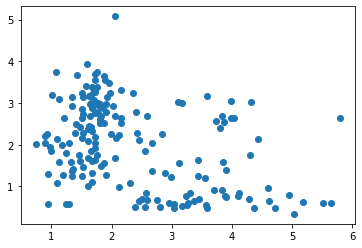

In [12]:
import matplotlib.pyplot as plt
plt.scatter(metrics2D[:,0], metrics2D[:,1])

In [13]:
metrics2D

array([[1.71, 3.06],
       [1.78, 2.76],
       [2.36, 3.24],
       [1.95, 3.49],
       [2.59, 2.69],
       [1.76, 3.39],
       [1.87, 2.52],
       [2.15, 2.51],
       [1.64, 2.98],
       [1.35, 3.15],
       [2.16, 3.32],
       [1.48, 2.43],
       [1.73, 2.76],
       [1.73, 3.69],
       [1.87, 3.64],
       [1.81, 2.91],
       [1.92, 3.14],
       [1.57, 3.4 ],
       [1.59, 3.93],
       [3.1 , 3.03],
       [1.63, 3.17],
       [3.8 , 2.41],
       [1.86, 2.88],
       [1.6 , 2.37],
       [1.81, 2.61],
       [2.05, 2.68],
       [1.77, 2.94],
       [1.72, 2.19],
       [1.9 , 2.97],
       [1.68, 2.33],
       [1.5 , 3.25],
       [1.66, 3.19],
       [1.83, 2.69],
       [1.53, 2.74],
       [1.8 , 2.53],
       [1.81, 2.98],
       [1.64, 2.68],
       [1.65, 2.43],
       [1.5 , 2.64],
       [3.99, 3.04],
       [1.71, 3.29],
       [3.84, 2.68],
       [1.89, 3.56],
       [3.98, 2.63],
       [1.77, 3.  ],
       [4.04, 2.65],
       [3.59, 3.17],
       [1.68,

In [14]:
def is_pareto_efficient_dumb(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient


In [15]:
al = metrics3D
l = []
while al.shape[0]>0:
    fronts = np.argwhere(is_pareto_efficient_dumb(al)).flatten().tolist()
    l.append(al[fronts])
    al = np.delete(al, fronts,axis=0)
print(l)

[array([[0.94, 1.36, 0.57],
       [0.9 , 1.71, 2.03],
       [0.74, 2.5 , 2.01],
       [3.59, 2.19, 0.48],
       [2.56, 2.35, 0.5 ],
       [3.57, 2.15, 0.55],
       [5.04, 2.23, 0.34],
       [4.36, 2.26, 0.47],
       [3.03, 2.32, 0.49],
       [2.39, 2.28, 0.51]]), array([[1.1 , 2.28, 1.09],
       [1.01, 1.7 , 3.18],
       [1.17, 1.92, 2.  ],
       [0.94, 2.36, 1.3 ],
       [1.19, 1.75, 1.28],
       [0.99, 1.95, 1.85],
       [0.92, 2.  , 2.26],
       [0.89, 2.58, 2.21],
       [0.98, 2.24, 1.94],
       [2.08, 1.7 , 2.17],
       [3.43, 1.98, 1.25],
       [1.24, 2.25, 0.58],
       [4.72, 2.54, 0.47],
       [2.81, 2.7 , 0.5 ],
       [1.29, 2.1 , 0.58],
       [3.26, 2.54, 0.56]]), array([[1.25, 1.92, 1.79],
       [1.13, 2.16, 3.1 ],
       [1.61, 2.21, 1.02],
       [1.09, 2.3 , 2.14],
       [1.13, 2.51, 1.58],
       [1.33, 2.3 , 1.59],
       [2.12, 2.74, 0.99],
       [1.07, 2.1 , 3.75],
       [1.34, 1.9 , 1.36],
       [1.72, 1.88, 1.64],
       [3.74, 1.82, 2.5

In [16]:
len(l)

12

In [24]:
ll = [59, 113, 138, 141, 146, 165, 170, 171]
a = metrics2D[ll,:]
n_cases = a.shape[0]
n_obj = a.shape[1]
normalized = np.zeros_like(a)
for i in range(n_obj):
    min_val = np.min(a[:,i])
    max_val = np.max(a[:,i])
    val_range = max_val - min_val
    print(min_val,max_val, val_range)
    normalized[:,i] = (a[:,i] - min_val) / val_range
print(a)
print(normalized)
print(normalized[normalized[:, 0].argsort()])
distances = np.zeros(n_cases)



for fronts in a:
    for j in range(n_obj):
        sorted_a = normalized[normalized[:, j].argsort()]
        distances[0] = np.inf
        distances[-1] = np.inf
        if len(sorted_a) > 2:
                for ii in range(1,len(sorted_a)-1):
                    distances[ii] += sorted_a[ii+1,j] - sorted_a[ii-1,j]
        
print(distances)



0.74 5.04 4.3
0.34 2.01 1.6699999999999997
[[0.94 0.57]
 [0.74 2.01]
 [3.59 0.48]
 [2.56 0.5 ]
 [5.04 0.34]
 [4.36 0.47]
 [3.03 0.49]
 [2.39 0.51]]
[[0.04651163 0.13772455]
 [0.         1.        ]
 [0.6627907  0.08383234]
 [0.42325581 0.09580838]
 [1.         0.        ]
 [0.84186047 0.07784431]
 [0.53255814 0.08982036]
 [0.38372093 0.10179641]]
[[0.         1.        ]
 [0.04651163 0.13772455]
 [0.38372093 0.10179641]
 [0.42325581 0.09580838]
 [0.53255814 0.08982036]
 [0.6627907  0.08383234]
 [0.84186047 0.07784431]
 [1.         0.        ]]
[       inf 3.74042612 3.10976187 1.28650606 2.01208745 2.80974795
 9.88330316        inf]


In [18]:
(-0.74+2.39) + (-2.01+0.51)
113, 59, 171, 141, 170, 138, 165, 146
0.383
146, 165, 138,..
0.08

In [28]:
(1-0.6627907) + (1-0.10179641)

1.23541289

In [20]:
np.allclose(CrowdingDist(a),[np.inf, 1.20264686, 0.37910368, 0.14945202,
                                     0.23983638, 0.30954001, 0.3554306, np.inf])

False

In [40]:
np.any([[True, False], [False, False], [True, False]], axis=0)

array([ True, False])

In [37]:
np.any([[True, False], [False, False], [False, True]], axis=1)

array([ True, False,  True])

In [38]:
np.any([[True, False], [False, False], [False, True]])

True

In [71]:
np.any(metrics2D[12:]>metrics2D[11,:], axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [58]:
aa = metrics2D[:0]

In [59]:
bb = metrics2D[1,:]

In [69]:
metrics2D[11,] > metrics2D[9,]

array([ True, False])

In [70]:
np.any(metrics2D[11,] > metrics2D[9,])

True

In [56]:
bb

array([1.78, 2.76])

In [63]:
type(np.array((1,2)))

numpy.ndarray